# Project Scope

With COVID-19 drastically changing the daily lives of city dwellers, we are banking on an increased interest in bikes as transportation.  While not everyone is able to or interested in owning their own, we believe a bikeshare model will provide service for citizens, as well as a stable business opportunity for our company.  

### How many bikes will ne needed?

We want to ensure we have enough bicycles available at any given time.  We need to account for seasonal interest, assuming growth in nicer weather and shirnkage during colder months.


Too few, and we risk turning off customers by lack of availability when they are sought

Too many, and we run the chance of not recouping expenses from initial costs, maintenance, staffing...etc

### The variables in question.

Looking at two years of DC metro bike share, we have identified some very helpful variables to reach our goals

* Temperature and Ambient temperature ('temp','atemp')
    * A large signifier of interest in riding, especially for the casual rider
* Casual and Registered ridersghip ('casual','registered')
    * Casual riders are those who can be thought of as the tourist or leisurely rider.  This numbers can be expected to rise with nicer (warmer) temperatures
    * Registered riders are those who are likely commuters, who will likely be riding in unfavorable conditions as much as favorable conditions

In [1]:
""" 
Master list of imports
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

LineR = LinearRegression()

In [2]:
"""
Reading the data into a DataFrame, and keeping a 'dirty' copy if needed for reference.
Retaining only columns of interest
"""

df_dirty = pd.read_csv(r"C:\Users\marce\Documents\Graduate School\Data 602\Linear Regression HW\Bike\Bikeshare.csv")
df = df_dirty.dropna()
df = df[['dteday','temp', 'atemp' ,'hum','windspeed','casual','registered','cnt']]

df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3]:
"""
Creating our test and training splits
"""

X_train, X_test = train_test_split(df, test_size = 0.2)

print("Training Data Shape:" ,X_train.shape,"Testing Data Shape:", X_test.shape)

Training Data Shape: (584, 8) Testing Data Shape: (146, 8)


# This is the modeling framework for each set of feaures.  

* Variables and Arguments needed:
    * train : the training set
    * test : the test set
    * feat : the features used in training
    * y_feat : the feature we are trying to predict

In [4]:
"""
train: the training set
test: the test set
feat: features must be in brackets ['feat1','feat2', ...etc]
"""

def LR_fit(train, test, feat):
    
    #finding genral statistical values in the training set
    LineR.fit(train[feat] , train.cnt)
    print("Intercept::", LineR.intercept_, "Coefficient", LineR.coef_)
    r_square = LineR.score(train[feat], train.cnt)
    print("R-squared value: ", r_square)
    
    #training model with training set
    X = train[feat]
    y = train.cnt
    X = sm.add_constant(X)
    mod = sm.OLS(y, X, hasconst= True)
    res = mod.fit()
    print(res.summary())
    
    #Test model with test set
    Xtest = test[feat]
    ytest = test.cnt
    Xtest = sm.add_constant(Xtest)
    y_predict = res.predict(Xtest)
    
    #printing predicted y-values
    print("Predicted y values", y_predict)    
    residuals = res.resid

    
    #Checking residuals
    y_pred = res.predict(X)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predicted values')
    plt.ylabel('residuals')
    plt.tight_layout()
    
    test['Predicted'] = y_predict

    # Visual chart for checking accuracy of model
    test.plot(x='dteday', y=['Predicted','cnt'], figsize=(20, 5))
    

## Regression temp/atemp
Are these features strong indicators?
* No
It looks like they cannot account enough for outliers in ridership

Intercept:: 1156.4269974449307 Coefficient [58.37641496 91.51354461]
R-squared value:  0.3743957775640028
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           6.68e-60
Time:                        16:16:54   Log-Likelihood:                -5113.6
No. Observations:                 584   AIC:                         1.023e+04
Df Residuals:                     581   BIC:                         1.025e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marce\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


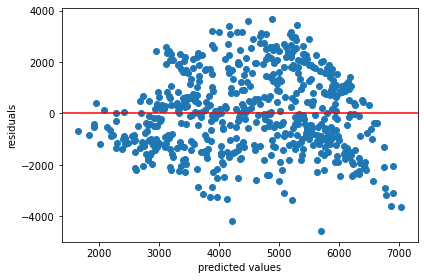

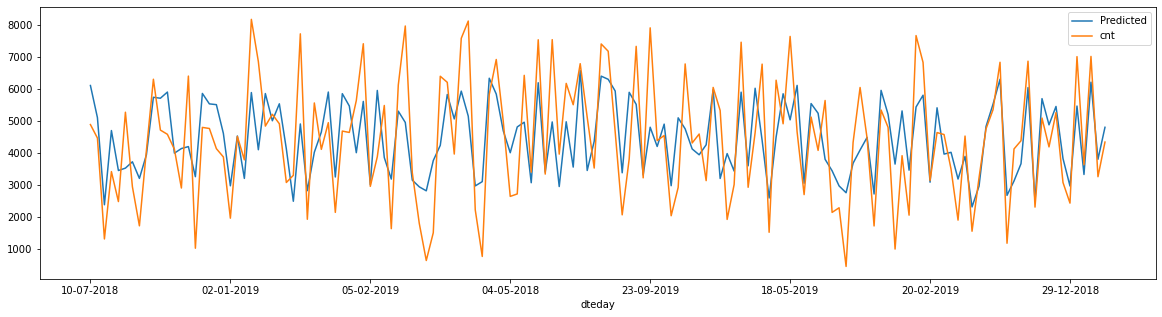

In [5]:
LR_fit(X_train, X_test, ['temp','atemp'])

## Regression casual riders
Are casual riders a strong indicator?
* No.  Some pretty wide misses on both sides
Casual ridership appears to have little effect on total ridership

Intercept:: 2900.5468772213353 Coefficient [1.914309]
R-squared value:  0.4576377259376365
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     491.1
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           2.32e-79
Time:                        16:16:55   Log-Likelihood:                -5071.9
No. Observations:                 584   AIC:                         1.015e+04
Df Residuals:                     582   BIC:                         1.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marce\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


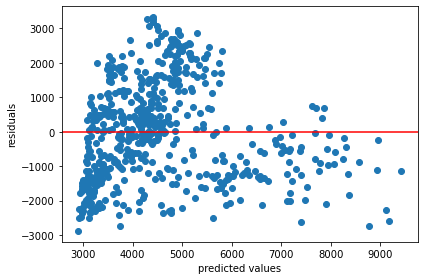

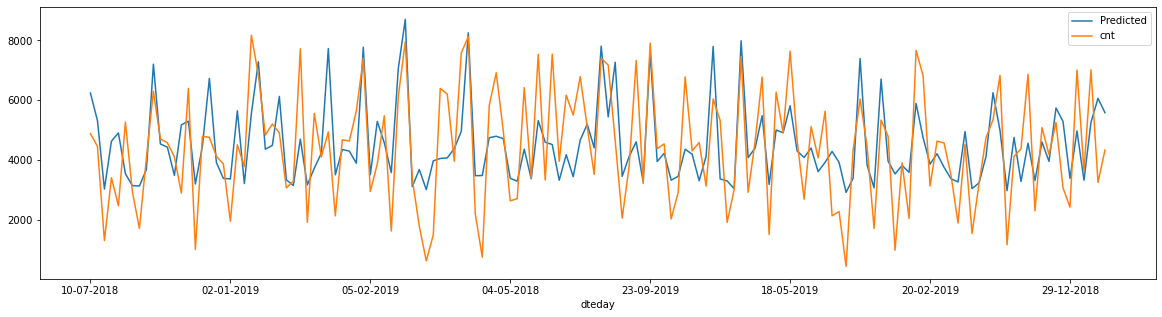

In [6]:
LR_fit(X_train, X_test, ['casual'])

## Regression registered riders
Registered riders are so far the strongest predictor in total ridership where:
* casual mean / cnt mean:
    * 849 / 4508	= 18.8%
* registered mean:
    * 3658 / 4508 = 81.2%

Intercept:: 202.87976252860153 Coefficient [1.17654229]
R-squared value:  0.8952762377004806
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4975.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          2.38e-287
Time:                        16:16:55   Log-Likelihood:                -4591.6
No. Observations:                 584   AIC:                             9187.
Df Residuals:                     582   BIC:                             9196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marce\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


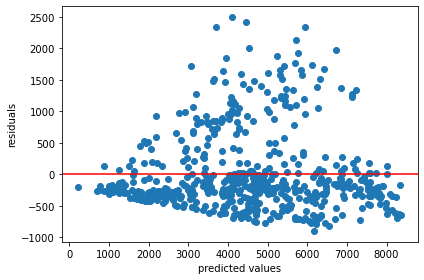

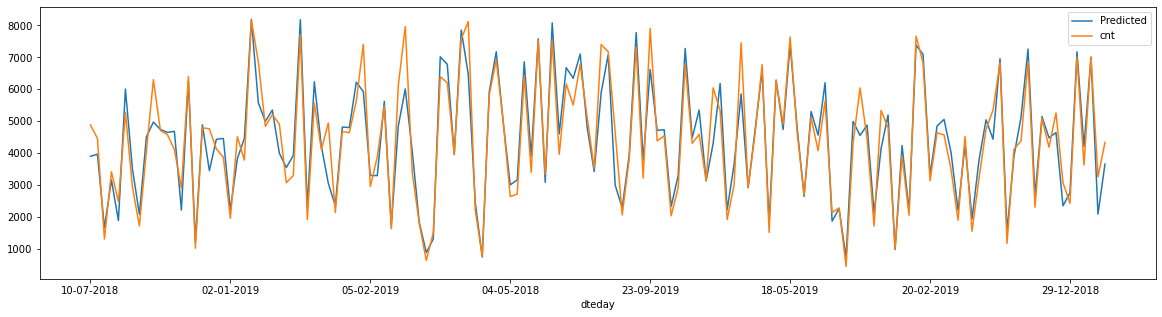

In [7]:
LR_fit(X_train, X_test, ['registered'])


## Combined regression (temp, atemp,, registered)
Here we see a general improvement in both R-squared values, and predicted values.  This is an OK model, and certainly better than wild guessing.

Intercept:: -268.790861414921 Coefficient [13.6632632  25.6268082   1.07381514]
R-squared value:  0.9130904098229508
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2031.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          3.93e-307
Time:                        16:21:05   Log-Likelihood:                -4537.2
No. Observations:                 584   AIC:                             9082.
Df Residuals:                     580   BIC:                             9100.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marce\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


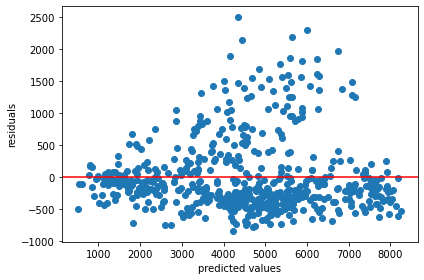

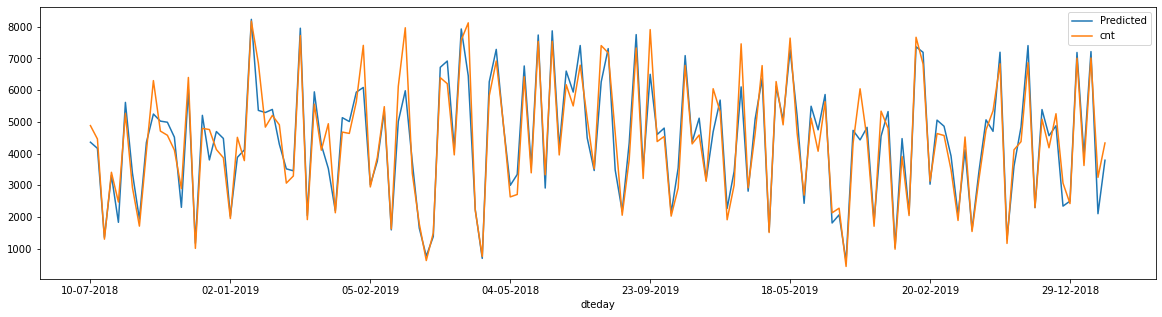

In [9]:
LR_fit(X_train, X_test, ['atemp','temp','registered'])

# Findings

 ### While temperature/ambient temperature was where we had hoped to find the best indicator, it appears daily registerd users are by far the strongest predictor.  The final model is fairly linear, and hopefully with more years of data to examine, we can create a model that will allow the program to operate efficiently in other metro areas.  
 
 
 ### Moving forward, we have a decent model to ensure we have enough bikes for ridership when we launch.  
 
 
 ## Shortcommings in the project itself (meta)
* I would have liked to have tried out other modes of modeling, however concerned with finding a good and linear set, I played around with:
         * Kickstarter dataset,
             * I spent days on cleaning and transformations without finding anything meaningful
         * IMDB dataset:
             * This was a fun dataset, but realzied I could not find a good 'problem' to tackle.  This set would have been good for simple EDA
* Having a strong business inquiry is just as important as having meaningful data.  I found the available data a little underwhelming. 
* Other modeling I researched including Random Forest and Gradient Descent, although I did not find myself fully confident in their execution to include their code in my final assessment.